<a href="https://colab.research.google.com/github/glauciodrumond/Data_Science_Projects/blob/master/Project_Credit_Card_Fraude_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraude Detection

In this project, we will address the problem of credit card fraud, one of the main concerns of financial institutions such as banks and fintechs. In Brazil alone, about 12.1 million people already suffered from some form of financial fraud in the last year. Translating into values, the financial scams have exceeded the amount of R$ 1.8 billion in losses per year in the last 12 months.


<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"><p>

Among these frauds, those involving credit cards are of great relevance since their non-detection will result in considerable losses, both for the consumer and for the financial institution.

Another factor to be considered is the amount of false positives, which is those times when you tried to make a purchase and had your card blocked preventively - probably causing stress and embarrassment.

For all these reasons, investment in the area of ​​fraud detection through Artificial Intelligence has been growing every year, representing a great opportunity in *Data Science*.

With large volumes of data as a historical basis, a machine learning algorithm just a little better than the previous ones already represents savings of millions of Reais. And that is the challenge, to increasingly improve the use of algorithms to inhibit or prevent fraudulent transactions.

## Importing the data

The data that we will use in this project has been made available by some European credit card companies. The *dataset* represents financial transactions that took place in the two-day period, where 492 frauds were classified in almost 290 thousand transactions.

As you can see, this is an extremely unbalanced data set, where fraud represents only 0.17% of the total.

Another interesting detail is that the *features* are all numeric, and were not featured (due to privacy and security issues). Thus, column names are represented by $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[On the original data page](https://www.kaggle.com/mlg-ulb/creditcardfraud), it is also reported that the variables underwent a transformation known as Principal Component Analysis (PCA).

PCA allows the reduction of dimensionality while maintaining the largest possible amount of information. To achieve this, the algorithm finds a new set of resources - the so-called **components**.

These components are less than or equal to the original variables. In the case of this project, the components found by the transformation of the PCA are the columns themselves $[V1, V2, V3 \dots, V28]$.

In [1]:
# importing libraries for data analysis
# importar os pacotes para analise dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from termcolor import colored
sns.set_style()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To be easier, there is a *link* with direct access to `csv`. With this we just need to import our dataset using the method `pd.read_csv()`.

In [0]:
# File path to get the dataset
# Caminho do arquivo para chegar ao dataset
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importing the data to a dataframe
# importar os  para um dataframe
df_raw = pd.read_csv(file_path)


#Exploratory Analysis 

With our data imported inside the dataframe structure and not having a necessity of any adjust or configuration in this fase, we will start our exploratory analysis to prepare to create a Machine Learning algorithm.


*** This is our dataframe's shape:**



In [3]:
# show dataframe shape
# mostrar tamanho do dataframe
print("Rows: " , df_raw.shape[0])
print("Columns: ", df_raw.shape[1])

Rows:  284807
Columns:  31


*Using the method `.head()` we can check our dataframe first five entries and observe some things such as:*



*   The columns `Time` and `Amount` were preserved keeping original values
*   The variable `Class` means if the trasactions was a normal one (value=0) or a fraude(value=1)
*   We can see how the PCA transformation changed the left the features $[V1, V2, V3 \dots, V28]$




In [4]:
# show first 5 entries of our dataset
# mostras as 5 primeiras entradas do nosso dataset
df_raw.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


*Using the method `.describe()` we can check our dataframe's statistical summary for the numerical variables*

Checking the variable `Amount` we observe that the highest trasaction was 25691,16 and the transactions amount mean is aproximately 88,35.




In [5]:
# show the statistcal summary
# mostrar o resumo estatistico
df_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*** In our dataset there is any null value?** 

There is no null values in this dataset, which means there is no need to go through cleaning phase.


In [6]:
# look for null values
# procurar por valores ausentes
df_raw.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### ***BAR CHART***

*** HOW BALANCED IS OUR DATASET?**

Having a look at our variable called  `Class`  we notice that out dataset is unbalanced, this is going to be a problem that will need to be addressed prior to create our machine learning model. If this problem is not addressed our machine learning model will give us poor results.

Number of cases:
0    284315
1       492
Name: Class, dtype: int64

Frauds represents 0.1727% of the dataset.



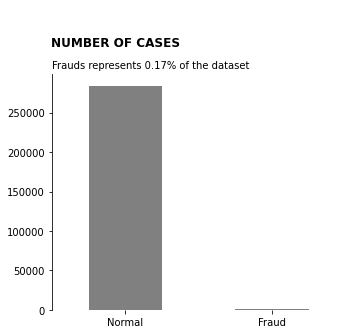

In [7]:
# plot bar chart showing number class types
# gera grafico de barra mostrando numero fraudes

fig, ax = plt.subplots(figsize=(5,4))
name = [ "Normal","Fraud"]
ax = df_raw.Class.value_counts().plot(kind = 'bar', grid = False , color = 'grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Frauds represents 0.17% of the dataset", fontsize = 10, loc='left')
ax.set_xticklabels (name, rotation = 0)

plt.suptitle("\n\nNUMBER OF CASES\n\n",weight = 'bold', x=0.33,y=1.15)
plt.tight_layout();
print("Number of cases:")
print(df_raw.Class.value_counts())
print("\nFrauds represents {:.4f}% of the dataset.\n".format((df_raw[df_raw.Class == 1].shape[0] / df_raw.shape[0]) * 100))


### ***HISTOGRAM*** 
We plotted two histograms in order to compare the distributions of the 2 classes along the time dimension (`Time`). However, no information has been identified from the frequency distributions below.

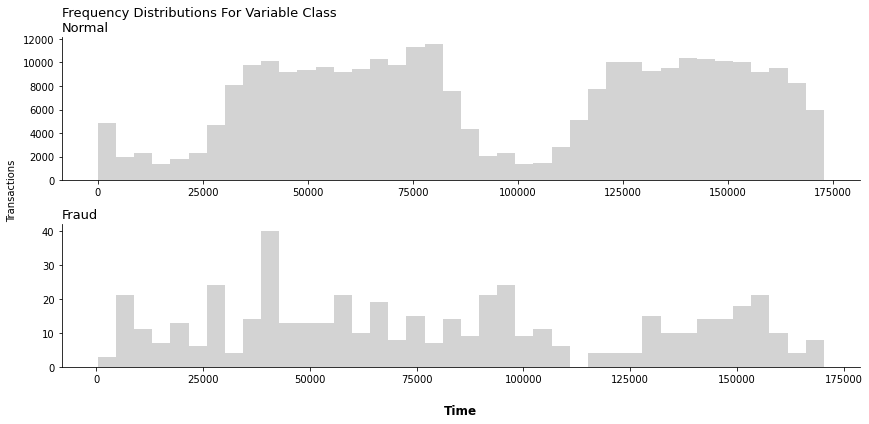

In [8]:
# Plot histogram for variable Time por Class type
# Plotar um histograma para a variavel Time por tipo de Classe
fig, ax = plt.subplots(nrows= 2, ncols=1, figsize = (12,6))
num_bins = 40

ax[0].hist(df_raw.Time[df_raw.Class == 0], bins = num_bins, color = 'lightgrey' )
ax[0].set_title('Frequency Distributions For Variable Class\nNormal',loc='left', size=13)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)

ax[1].hist(df_raw.Time[df_raw.Class == 1], bins = num_bins, color = 'lightgrey')
ax[1].set_title('Fraud',loc='left', size=13)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
    
# Set x-axis label
plt.xlabel("Time", labelpad=20, size=12, weight='bold')
fig.text( 0, 0.55, 'Transactions', ha='center', va='center', rotation='vertical')
#plt.ylabel("Transactions")

plt.tight_layout();

### ***BOXPLOT***
Following the exploratory analysis, the boxplots were plotted to see if there is any difference in the transaction pattern in relation to the `Amount`.

In general, a different distribution is noticed for the two classes, which will probably contribute to the training of the machine learning model.

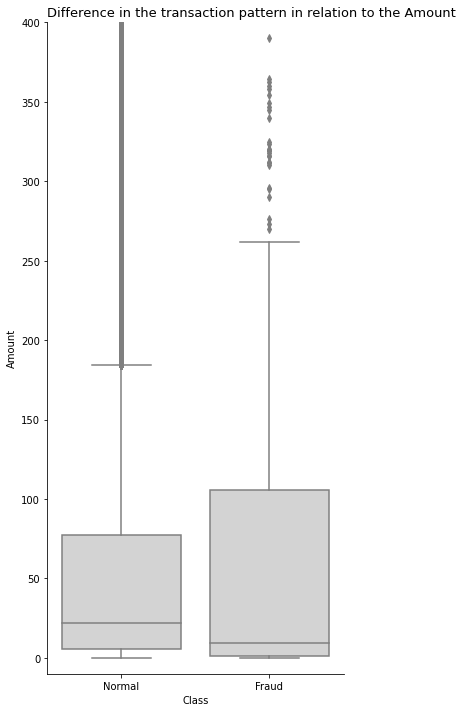

In [9]:
# Plot a boxplot for variable amount
fig, ax = plt.subplots(figsize=(6,10), sharex = True)

sns.boxplot(df_raw.Class, df_raw.Amount, color='lightgrey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_title('Difference in the transaction pattern in relation to the Amount',loc='left', size=13)
plt.xticks([0,1] , ['Normal', 'Fraud'])
plt.ylim((-10, 400))

plt.tight_layout();

## ***PCA COLUMNS***
These are the the columns that went through PCA transformation, we checking it's frequency to find similarities between them. 


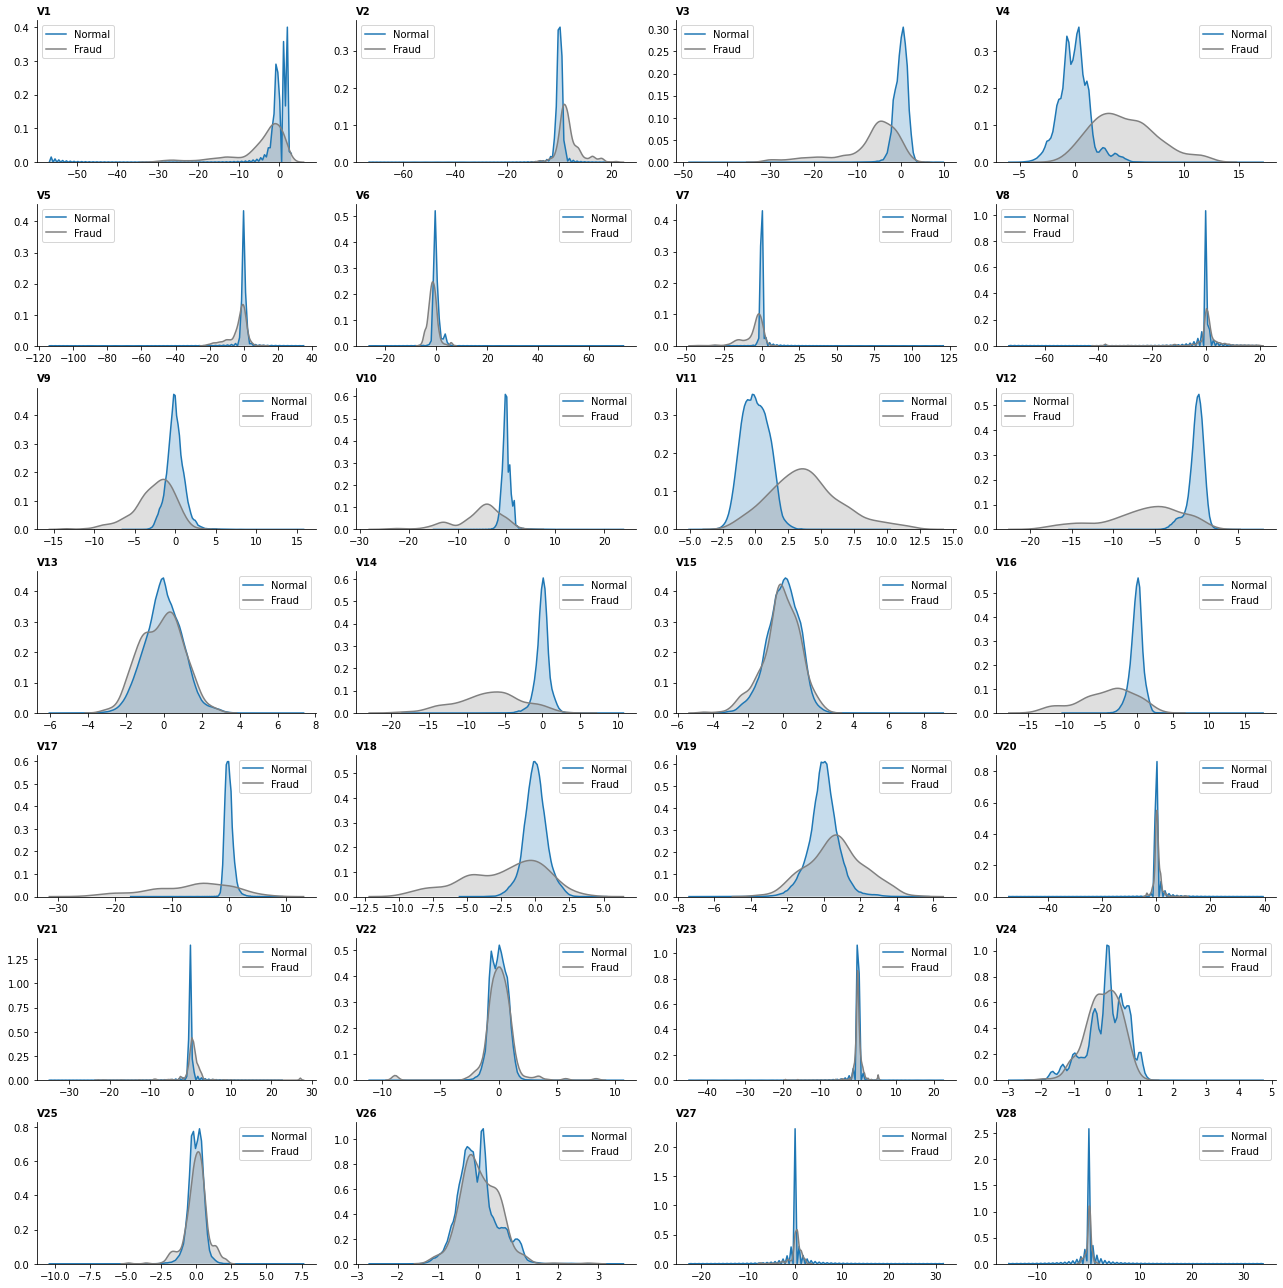

In [10]:
# Features that pass through PCA transformation frequency distribuition
column_names = df_raw.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_normal = df_raw[df_raw.Class == 0]
df_fraud = df_raw[df_raw.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_normal[col], label="Normal", shade=True)
    sns.kdeplot(df_fraud[col], label="Fraud", shade=True, color = 'GREY')
    sns.despine(left=False)
    plt.title(col, fontsize=10, loc= 'left', weight='bold')
plt.tight_layout()

**Summary of our analysis:**


*   Although we have more than 284 thousand entries, only 0.17% are fraudulent, making our dataset unbalanced.

*   The `Time` and `Amount` variables were kept at their original values ​​and will need to go through the **Scalling** process.

*   There are no null or missing values ​​in the dataset.

*   Since the PCA is sensitive to **Scalling**, it is assumed that the original features were standardized.



# Preparing the data

This is the process that we are gonna go through to get the data prepared

* Feature Scaling - (`Time` and `Amount`)
* Split the dataset in train and test
* Balance the dataset

## Standardize the data

Standardization is one of the most common preprocessing tools since data of different magnitude (scale) can be biased towards high values, we want all inputs to be of similar magnitude this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data.

A very useful module we can use is StandardScaler it has much more capabilities than the straightforward 'preprocessing' method.

Here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [0]:
# Copying the dataframe 
# Copiando o dataframe 
df = df_raw.copy()

In [0]:
# import libraries going to be used 
# importar as bibliotecas que serao usadas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Time', 'Amount']] = sc.fit_transform(df[['Time', 'Amount']])

*As we can see our dataframe now is scaled, which means that all variables has the same magnitude*

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Target and Features

Since we want to discover if a trasaction is a normal transaction or a fraude or target variables is the `class` we are going to call it y. So all the other variables is our features and we are going to call X.

In [0]:
# Create a variable that will contain the inputs 
# Criar a variável que ira conter nossas variáveis inputs  
X = df.iloc[:, :-1].values 
# Create a variable that will contain the targets (variable num)
# Criar a variavel que ira conter a variavel alvo (variavel num)
y = df.iloc[:, 30] .values

In [15]:
# check the shape of the inputs
# ver o formato das entradas
X.shape

(284807, 30)

In [16]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
# os scaled_inputs agora sao ndarray, porque o sklearn trabalha com ndarrays
y.shape

(284807,)

# Spliting the dataset

Now we are going to split the dataset in training and test, we almost there ....
A couple more steps and we are going to create our machine model.

In [0]:
# Importing librarie
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
# Dividindo o conj de dados em treino a teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, shuffle=True)

In [18]:
# Check the shape of the train inputs and targets
# Checar o formato do dataset de treino e alvos
print ("Train:" ,X_train.shape, y_train.shape)

# check the shape of the test inputs and targets
# Checar o formato do dataset de teste e alvos
print ("Test: " , X_test.shape, y_test.shape)

Train: (213605, 30) (213605,)
Test:  (71202, 30) (71202,)


## Balacing the Data
As I mentioned before we need to do something with our unbalanced data.
There is many ways to deal with it. I am going to be using a simple way but effective with great results, this technique is called `under-sampling` from `imblearn` library.



1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


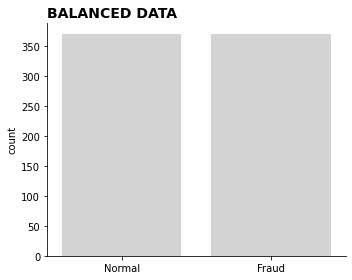

In [19]:
# import the librarie
# importar a biblioteca
from imblearn.under_sampling import RandomUnderSampler

# use under-sampling techinique
# usar técnica under-sampling
rus = RandomUnderSampler()
X_bal, y_bal = rus.fit_sample(X_train, y_train)

# show Class balance
# ver o balanceamento das classes
print(pd.Series(y_bal).value_counts());

# plot new Class distribution
# plotar a nova distribuição de classes
fig, ax = plt.subplots(figsize=(5,4))
name = [ "Normal","Fraud" ]
ax=sns.countplot(y_bal, color= 'lightgrey')
ax.set_title('BALANCED DATA', loc='left', weight = 'bold', fontsize = 14)
ax.set_xticklabels (name, rotation = 0)
sns.despine(left=False, bottom=False)

plt.tight_layout();

# Machine Learning Model


Finally we got to the fun part of the process, we are going to test some Machine Learning Models to compare their perfomace based in this dataset.


We are going to create 3 machine learning models and see how they perform one Logistic Regression, one SVC and one Random Forest. 

In the end we are going to see each one performed better.

In [20]:
# importing the librarie
# importar a biblioteca
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a object for each class
# Criar um objeto para cada classe
reg = LogisticRegression( )
svc = SVC(kernel = 'rbf')
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',)

# Fit our train inputs
# Usar metodo fit para treinar as entradas
reg.fit(X_bal, y_bal)
svc.fit(X_bal, y_bal)
rf.fit(X_bal, y_bal)

# Assess the train accuracy of the model
# Avaliar a precisao de treino do modelo
print ('Score for Logistic Regression:')
print (reg.score(X_bal, y_bal), '\n')
print ('Score for SVC:')
print (svc.score(X_bal, y_bal),'\n')
print ('Score for Random Forest:')
rf.score (X_bal, y_bal)

Score for Logistic Regression:
0.9539295392953929 

Score for SVC:
0.9390243902439024 

Score for Random Forest:


0.9905149051490515

In [0]:
# Predicting the Test set results
y_reg = reg.predict(X_test)
y_svc = svc.predict(X_test)
y_rf = rf.predict(X_test)

In [22]:
# check accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_reg)))

print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_svc)))

print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_rf)))

Accuracy: 0.9697

Accuracy: 0.9862

Accuracy: 0.9616



# Evaluate model performance

* Identify the best metric for this type of model
* [*Optional*] Compare performance across multiple models

In [23]:
# install scikit plot package
pip install scikit-plot

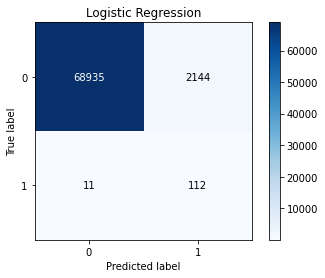

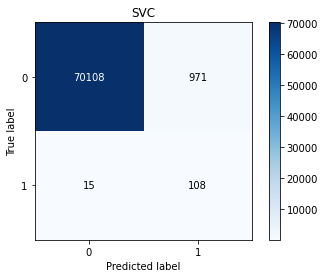

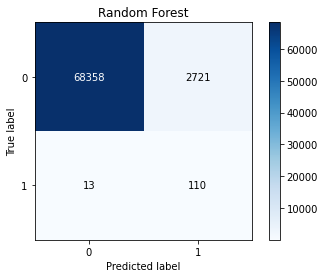

In [24]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_reg,  title='Logistic Regression',)
skplt.metrics.plot_confusion_matrix(y_test, y_svc, normalize=False, title='SVC')
skplt.metrics.plot_confusion_matrix(y_test, y_rf, normalize= False, title='Random Forest')

## Classification Report

Let's check our classification report that show a lot of information about our trained and tested Machine Learning models.

*   **Precision:** Accuracy of positive predictions.

*   **Recall:** Fraction of positives that were correctly identified.

*  **F1- score:** Is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0

In [25]:
# CLassification report
# Relatorio de classificacao
 
print('CLASSIFICATION REPORT\nLogistic Regression Model\n')
print(classification_report(y_test, y_reg))


print('\n\nCLASSIFICATION REPORT\nSVM Model\n')
print(classification_report(y_test, y_svc))


print('\n\nCLASSIFICATION REPORT\nRandom Forest Classifier Model\n')
print(classification_report(y_test, y_rf))

CLASSIFICATION REPORT
Logistic Regression Model

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.91      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



CLASSIFICATION REPORT
SVM Model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.88      0.18       123

    accuracy                           0.99     71202
   macro avg       0.55      0.93      0.59     71202
weighted avg       1.00      0.99      0.99     71202



CLASSIFICATION REPORT
Random Forest Classifier Model

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.89      0.07       123

    accuracy                           0.9

#Applying k-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
accu_reg = cross_val_score(estimator = reg, X = X_bal, y = y_bal, cv = 10)
print('Logistic Regression results:')
print("Accuracy: {:.2f} %".format(accu_reg.mean()*100))
print("Standard Deviation: {:.2f} %".format(accu_reg.std()*100))

accu_svc = cross_val_score(estimator = svc, X = X_bal, y = y_bal, cv = 10)
print('\n\nSVC results:')
print("Accuracy: {:.2f} %".format(accu_svc.mean()*100))
print("Standard Deviation: {:.2f} %".format(accu_svc.std()*100))

accu_rf = cross_val_score(estimator = rf, X = X_bal, y = y_bal, cv = 10)
print('\n\nRandom Forest results:')
print("Accuracy: {:.2f} %".format(accu_rf.mean()*100))
print("Standard Deviation: {:.2f} %".format(accu_rf.std()*100))

Logistic Regression results:
Accuracy: 93.90 %
Standard Deviation: 2.21 %


SVC results:
Accuracy: 93.22 %
Standard Deviation: 2.49 %


Random Forest results:
Accuracy: 94.17 %
Standard Deviation: 2.78 %


# Applying Grid Search to find the best model and the best parameters

# Conclusion

* Write your conclusions and respect for the construction of the model